## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


## EDA

In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


#### We can see that 
1. Min age of people coming in for these tests are 18 and max being 90 and the avg is 51.
2. The mean score of physical score is 32 and minimum being 0 and max being 50.

In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

#### We have 3000 people who passed the test and 2000 people who failed the test.

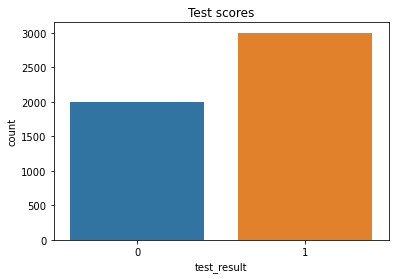

In [7]:
sns.countplot(data=df,x='test_result')
plt.title('Test scores');

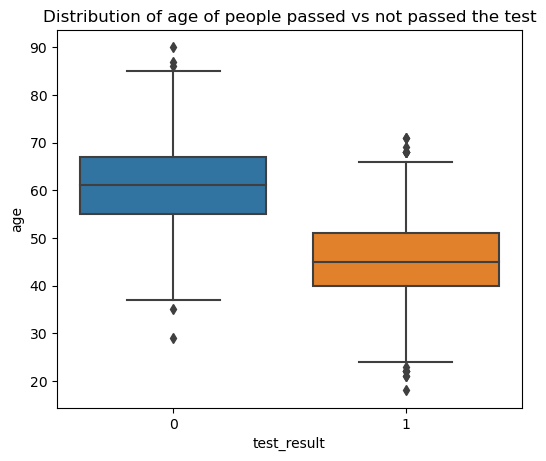

In [8]:
plt.figure(figsize=(6,5),dpi=100)
sns.boxplot(data=df, x='test_result',y='age')
plt.title('Distribution of age of people passed vs not passed the test');

#### So the above plot tells us that:-
People who do not pass the test tend to be older than the people who pass the test, which also makes sense because the older someone gets, they are more likely to be not able to listen the high pitched tones.

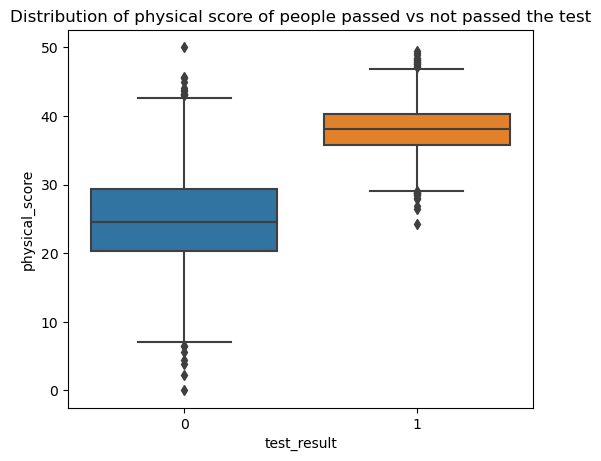

In [9]:
plt.figure(figsize=(6,5),dpi=100)
sns.boxplot(data=df, x='test_result',y='physical_score')
plt.title('Distribution of physical score of people passed vs not passed the test');

#### So the above plot tells us that:-
People with lower physical scores are more likely to be not able to listen to high pitched tones than people having higher physical scores.

People who pass the test have really high physical scores.

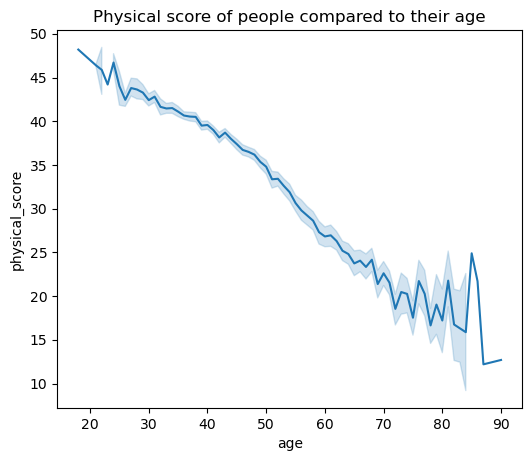

In [10]:
plt.figure(figsize=(6,5),dpi=100)
sns.lineplot(data=df,x='age', y='physical_score')
plt.title('Physical score of people compared to their age');

#### So we can see that as the age of people increases their physical scores decreases.

In [11]:
# We can now also see this with the test results

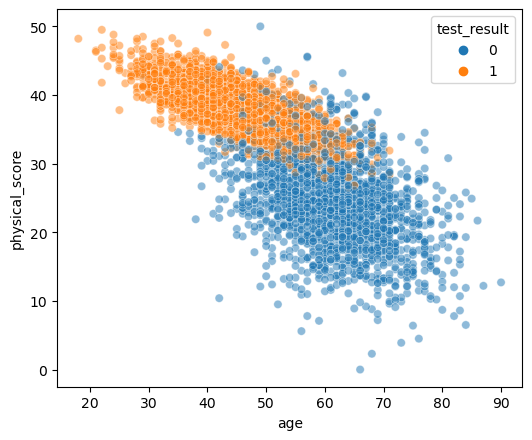

In [12]:
plt.figure(figsize=(6,5),dpi=100)
sns.scatterplot(data=df,x='age',y='physical_score',hue='test_result',alpha=0.5);

#### So if you someone is younger, they tend to have a higher physical score and are more likely to pass the test.

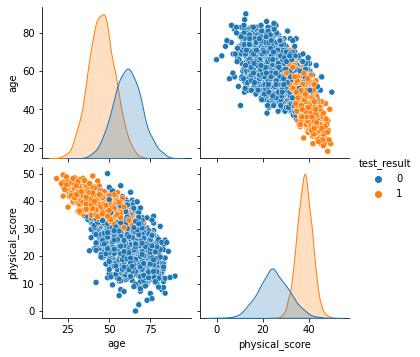

In [13]:
# Use pairplot for categorical data
sns.pairplot(df,hue='test_result');

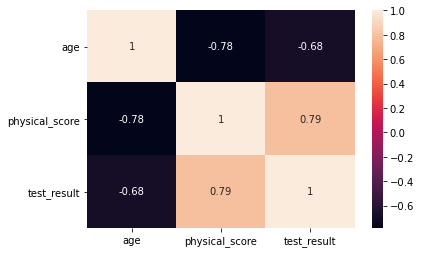

In [14]:
sns.heatmap(data=df.corr(),annot=True);

### So according to heatmap:-
1. As the age increases someone is more likely to not pass the test.
2. As the physical score increases someone is more likely to pass the test.

#### Sometimes when we are dealing with classes, scatterplots don't really work too well if one of the axes is going to be based on the class.

#### So let's see some scatter plots that are not too informative sometimes and then let's see how we could use a 3D plot depending on how many features you have to try to clarify that information.

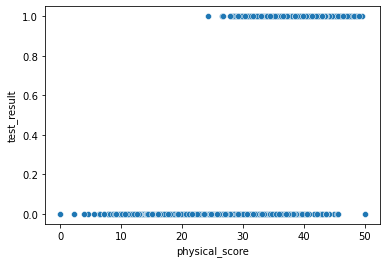

In [15]:
sns.scatterplot(data=df,x='physical_score',y='test_result');

In the case of the above scatterplot where one of the variable is categorical scatterplot does not help much.

Instead using a boxplot helps more.

#### So when we have similar datasets, with just a few features we can take advantage of that and actually view images in 3D.

In [16]:
# We use this lib to use 3d scatterplots
from mpl_toolkits.mplot3d import Axes3D

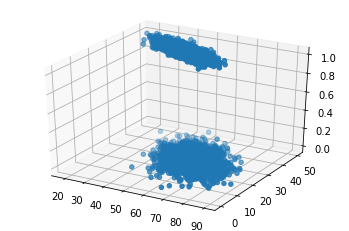

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(xs=, ys=, zs=, marker=m)
ax.scatter(df['age'], df['physical_score'], df['test_result']);

### So we have this two clusters, which is a 3D projection of the scatterplot.

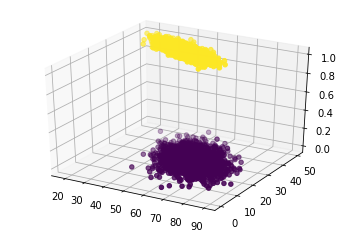

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(xs=, ys=, zs=, marker=m)
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result']);

#### So we can clearly see the difference between people that did not pass he exam vs the people who did pass the exam.

#### This means that the model should be able to perform/score well on this classification task.

# Creating and training the Logisstic Regression model

#### Feature selection

In [19]:
X = df.drop('test_result',axis=1)

In [20]:
y = df['test_result']

#### Feature scaling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(X_train)

StandardScaler()

In [25]:
scaled_X_train = scaler.transform(X_train)

In [26]:
scaled_X_test = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_model = LogisticRegression()

In [29]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [30]:
# The coefficients
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [31]:
y_pred = log_model.predict(scaled_X_test)

In [32]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

### Notice that the above result shows us results directly in 0 and 1.

In [33]:
#### We can also see results in probabilities

In [34]:
y_pred_prob = log_model.predict_proba(scaled_X_test)
y_pred_prob

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

### So what the above predictions are telling us is that what is the probablity of belonging to one class:-
1. In the predictions the first col/ first set of terms tell us what is prob of belonging to class 0 - that is did not pass the test.
2. In the predictions the second col/ second set of terms tell us what is prob of belonging to class 1 - that is passed the test.

### Performance evaluation:- 

1. Recall
2. Precision
3. F1 score

In [35]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [37]:
X.columns

Index(['age', 'physical_score'], dtype='object')

#### So what the coefficients are essentially telling us is that:-
1. Age is negatively related to test result - i.e., as age increases being able to listen to high pitch tones would decrease, i.e. chances of belonging to the cat - 1 decreases.
2. For physical score there is a postive relation to test score And that also makes sense because we can expect that as the physical score increases, the odds increase of passing the test result. Essentially the likelihood increases of belonging to the one class for test result because the coefficient for the physical score is positive.

#### Thus high physical score are much stronger predictor than age.

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##### Accuracy

In [39]:
accuracy_score(y_test, y_pred)

0.93

Overall accuracy is 93%

##### Confusion matrix

In [40]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

#### We can actually use a plot to see the results of confusion matrix

In [41]:
from sklearn.metrics import plot_confusion_matrix

Thie plot just need the 
1. LR model
2. Scaled X test data
3. y_test

And it will automatically create the confusion matrix plot for you

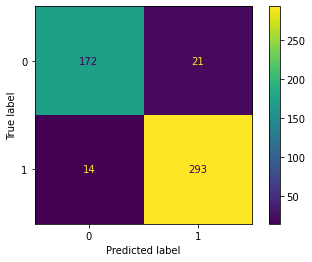

In [43]:
plot_confusion_matrix(log_model, scaled_X_test, y_test);

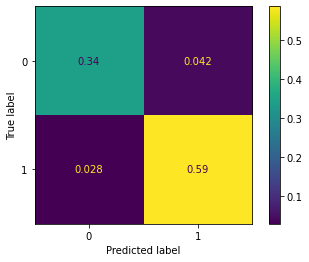

In [44]:
plot_confusion_matrix(log_model, scaled_X_test, y_test, normalize='all');

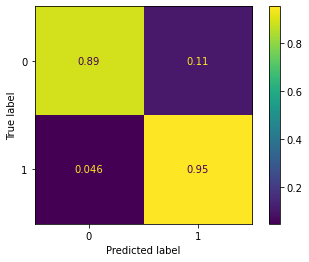

In [45]:
plot_confusion_matrix(log_model, scaled_X_test, y_test, normalize='true');

### But usually we keep just the raw data itself

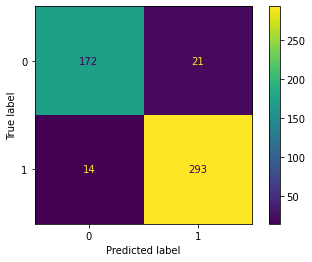

In [46]:
plot_confusion_matrix(log_model, scaled_X_test, y_test);

In [47]:
len(y_test)

500

##### Classification report

In [48]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.89      0.91       193\n           1       0.93      0.95      0.94       307\n\n    accuracy                           0.93       500\n   macro avg       0.93      0.92      0.93       500\nweighted avg       0.93      0.93      0.93       500\n'

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



##### What if we want the standard precision and recall

In [50]:
from sklearn.metrics import precision_score, recall_score

In [51]:
precision_score(y_test, y_pred)

0.9331210191082803

Note that here the precision and recall score is over everything and not like per class as we get in classification report.

In [52]:
recall_score(y_test, y_pred)

0.9543973941368078

### ROC curve and Precision-recall curve

### 1. ROC curve

In [53]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

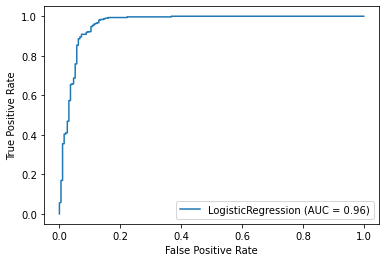

In [54]:
plot_roc_curve(log_model, scaled_X_test, y_test);

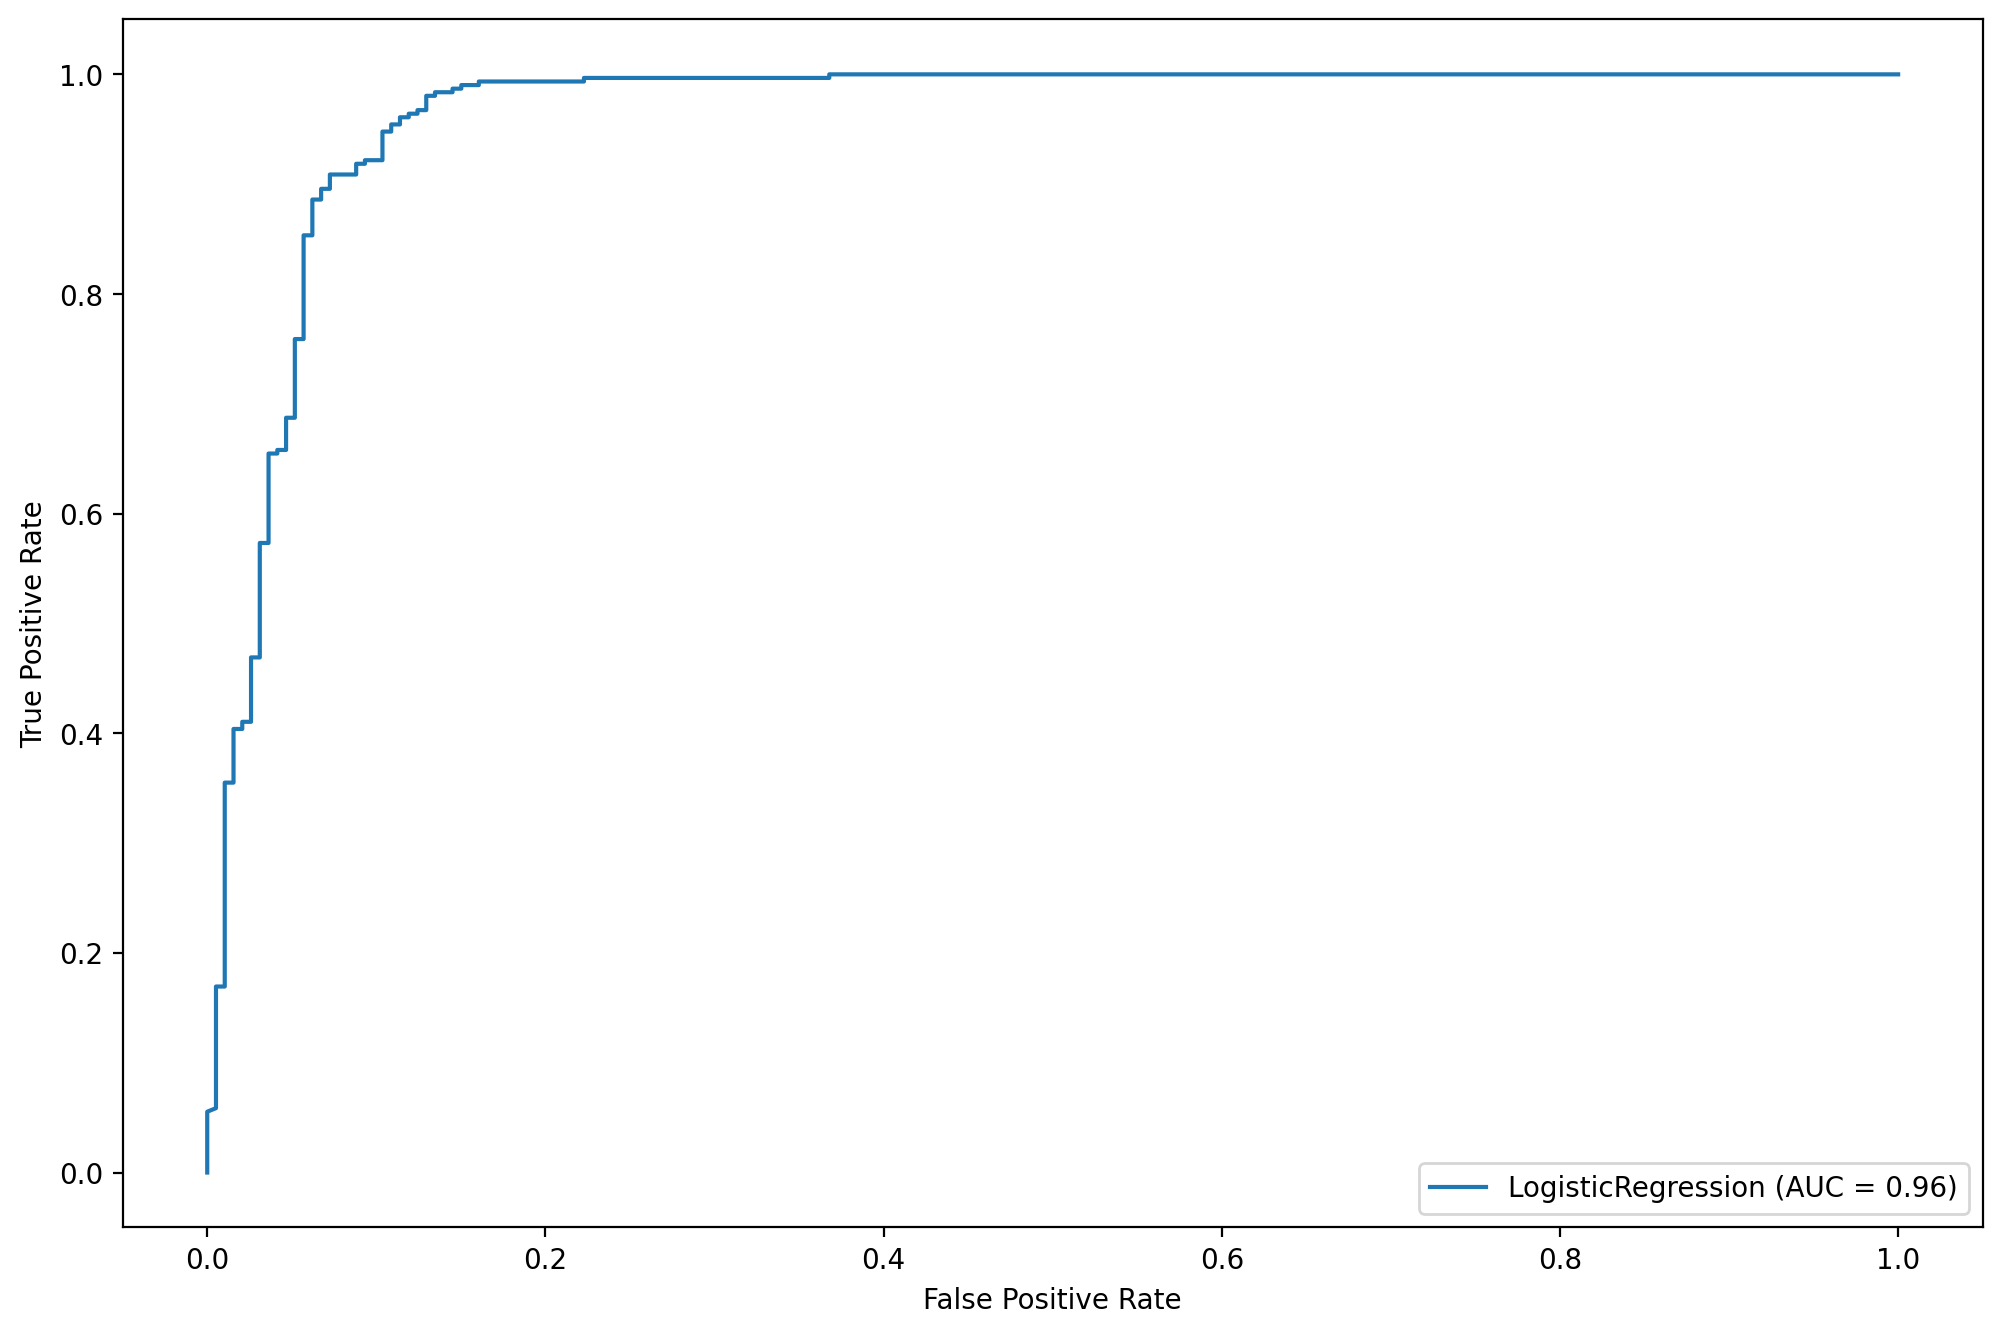

In [56]:
### To be able to edit it out
fig,ax = plt.subplots(figsize=(12,8),dpi=200)
plot_roc_curve(log_model, scaled_X_test, y_test,ax = ax);

That's how you connect matplotlib to scikit learn functions, ccreate an axes and then edit or change the look however you want

### 2. Precision-recall curve

Not as common as the ROC curve

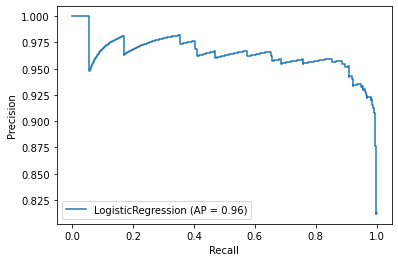

In [59]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test);

### So this was it for eveluation

We can also compare the prob to actual val

In [60]:
log_model.predict_proba(scaled_X_test)

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [61]:
# We can compare the first result to actual value

In [62]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [63]:
#actual value
y_test[0]

1

### So the probablity tells us that the prob of the first record in y_test belonging to class 0 = 2.38% and belonging to class 1 = 97.61% and also this is proved to be a correct prediction as actual first record in y_test belongs to class 1.